In [1]:
# Sâo Luís - LASSO Regression

In [2]:
import numpy as np 
import pandas as pd 

from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)
from matplotlib.pyplot import rcParams
%matplotlib inline
rcParams['figure.figsize'] = 6,4
sns.set(style='whitegrid', palette='muted',
        rc={'figure.figsize': (6,4)})
import warnings
warnings.simplefilter(action='ignore')

In [3]:
df = pd.read_excel(r"SaoLuis_ML_Std.xls")
df.head()

,SPD,CV,Price_sd,Price_skewness,Price_kurtosis,Cartel_SL
0,-1.512210,-1.415126,-1.523575,0.530595,-0.372297,1
1,-1.590998,-1.423813,-1.531361,0.465319,-0.465210,1
2,-1.472599,-1.390720,-1.500943,0.277075,-0.523992,1
3,-1.891792,-1.794681,-1.874691,0.988610,-0.150930,1
4,-1.512210,-1.424056,-1.531331,-0.390301,-0.859725,1


In [4]:
# Predicting Cartel
# define X and y
X = df.drop("Cartel_SL",axis = 1)
y = df.Cartel_SL

In [5]:
X.head()

,SPD,CV,Price_sd,Price_skewness,Price_kurtosis
0,-1.512210,-1.415126,-1.523575,0.530595,-0.372297
1,-1.590998,-1.423813,-1.531361,0.465319,-0.465210
2,-1.472599,-1.390720,-1.500943,0.277075,-0.523992
3,-1.891792,-1.794681,-1.874691,0.988610,-0.150930
4,-1.512210,-1.424056,-1.531331,-0.390301,-0.859725


In [6]:
#importing train_test_split

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42, stratify=y)

In [8]:
# grid search hyperparameters for lasso regression
from numpy import arange
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty='l1', solver='liblinear', class_weight="balanced")
# define model evaluation method
cv = RepeatedKFold(n_splits=5, n_repeats=5, random_state=1)
# define grid
grid = dict()
grid['C'] = arange(0.01, 1, 0.01)
# define search
search = GridSearchCV(model, grid, scoring="accuracy", cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X_train, y_train)
# summarize
print('accuracy: %.3f' % results.best_score_)
print('Best value for C: %s' % results.best_params_)

accuracy: 0.973
Best value for C: {'C': 0.99}


In [9]:
from sklearn.feature_selection import SelectKBest, SelectPercentile, SelectFromModel
sel=SelectFromModel(LogisticRegression(penalty='l1', C=0.99, solver ='liblinear', class_weight="balanced"))
sel.fit(X_train, y_train)
sel.get_support()

array([False,  True,  True,  True,  True])

In [10]:
sel.estimator_.coef_

array([[  0.        ,  12.22771201, -13.8301248 ,   0.4336064 ,
          0.49675585]])

In [11]:
X_train.columns

Index(['SPD', 'CV', 'Price_sd', 'Price_skewness', 'Price_kurtosis'], dtype='object')

In [12]:
features = X_train.columns[sel.get_support()]
features

Index(['CV', 'Price_sd', 'Price_skewness', 'Price_kurtosis'], dtype='object')

In [13]:
logreg = LogisticRegression(penalty='l1', C=0.99, solver ='liblinear', class_weight="balanced")
logreg.fit(X_train, y_train)

LogisticRegression(C=0.99, class_weight='balanced', penalty='l1',
                   solver='liblinear')

In [14]:
print(logreg.coef_, logreg.intercept_)

[[  0.          12.24219144 -13.84662238   0.43370445   0.49706645]] [-1.62459657]


In [15]:
# make class predictions for the testing set
y_pred = logreg.predict(X_test)

In [16]:
# calculate accuracy
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred))
#mean_squared_error(y_test, y_pred_class)

0.9777777777777777


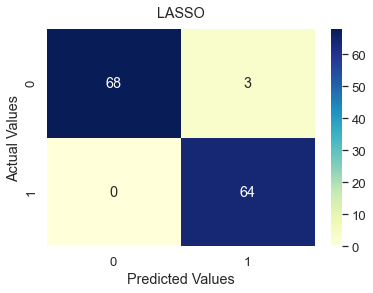

In [113]:
import seaborn as sns
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
sns.set(font_scale=1.2) # Adjust to fit
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('LASSO', y=1.025)
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.savefig('CM_Lasso_SaoLuis.png', dpi=600)

In [105]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        71
           1       0.96      1.00      0.98        64

    accuracy                           0.98       135
   macro avg       0.98      0.98      0.98       135
weighted avg       0.98      0.98      0.98       135



In [106]:
# store the predicted probabilities for class 1
from sklearn.metrics import roc_curve
y_pred_proba = logreg.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

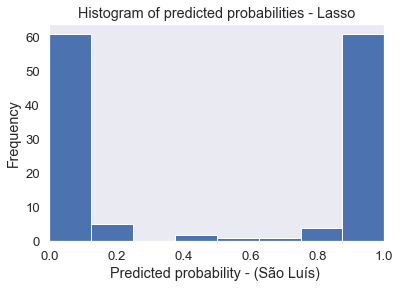

In [109]:
# histogram of predicted probabilities
plt.hist(y_pred_proba, bins=8)
plt.xlim(0, 1)
plt.title('Histogram of predicted probabilities - Lasso')
plt.xlabel('Predicted probability - (São Luís) ')
plt.ylabel('Frequency')
plt.grid(False)
plt.savefig('Histogram_Lasso_SaoLuis.eps', format='eps')
plt.show()

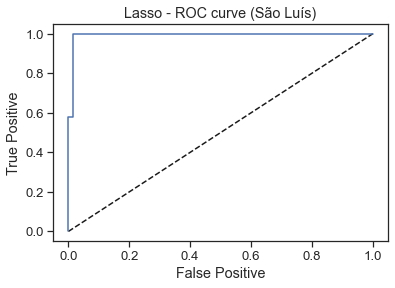

In [111]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Logistic')
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title('Lasso - ROC curve (São Luís)')
plt.grid(False)
sns.set_style("ticks")
plt.savefig('ROC_Lasso_SaoLuis.eps', format='eps')
plt.show()

In [22]:
from sklearn.metrics import roc_curve
y_pred_proba = logreg.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

In [23]:
# calculate cross-validated AUC
from sklearn.model_selection import cross_val_score
auc = cross_val_score(logreg, X_test, y_test, cv=5, scoring='roc_auc').mean()
print('AUC:',auc)

AUC: 1.0


In [24]:
import eli5
from eli5.sklearn import PermutationImportance

In [25]:
perm = PermutationImportance(logreg, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.4948 ± 0.0672,Price_sd
0.3481 ± 0.0562,CV
0.0030 ± 0.0119,Price_skewness
0 ± 0.0000,SPD
-0.0015 ± 0.0145,Price_kurtosis


In [26]:
# define a function that accepts a threshold and prints sensitivity and specificity
def evaluate_threshold(threshold):
    print('sensitivity:', tpr[thresholds > threshold][-1])
    print('specificity:', 1 - fpr[thresholds > threshold][-1])

In [27]:
evaluate_threshold(0.5)

sensitivity: 1.0
specificity: 0.9577464788732395


In [28]:
evaluate_threshold(0.6)

sensitivity: 1.0
specificity: 0.9859154929577465


In [29]:
evaluate_threshold(0.7)

sensitivity: 1.0
specificity: 0.9859154929577465


In [30]:
evaluate_threshold(0.8)

sensitivity: 0.578125
specificity: 0.9859154929577465


In [31]:
evaluate_threshold(0.9)

sensitivity: 0.578125
specificity: 0.9859154929577465


In [32]:
evaluate_threshold(0.99)

sensitivity: 0.015625
specificity: 1.0


In [56]:
#Testing the Best Model estimated for São Luís (LASSO Classifier) in the Belo Horizonte's database
df_BH= pd.read_excel(r"BeloHorizonte_ML_Std.xls")
df_BH.head()

,SPD,CV,Price_sd,Price_skewness,Price_kurtosis,Cartel_BH
0,2.189400,0.696896,-0.998037,1.168642,1.167386,1
1,2.080311,0.575242,-1.052757,1.306965,1.297908,1
2,2.721430,0.301509,-1.186487,0.909275,1.058800,1
3,1.905134,0.254569,-1.208158,1.094816,1.235846,1
4,2.879854,0.487816,-1.101539,0.829424,0.997040,1


In [58]:
# Predicting the Cartel in Caxias do Sul
# define X and y
X_BH = df_BH.drop("Cartel_BH",axis = 1)
y_BH = df_BH.Cartel_BH

In [59]:
# summarize the dataset
print(X.shape, y.shape, X_BH.shape, y_BH.shape)

(449, 5) (449,) (496, 5) (496,)


In [60]:
# make class predictions for the testing set
y_pred_BH = logreg.predict(X_BH)

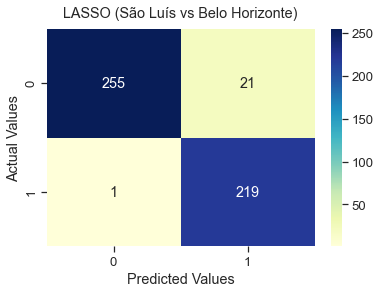

In [112]:
cnf_matrix = metrics.confusion_matrix(y_BH, y_pred_BH)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('LASSO (São Luís vs Belo Horizonte)', y=1.025)
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.savefig('CM_LASSO_SL_vs_BH.png', dpi=600)

In [62]:
print(classification_report(y_BH,y_pred_BH))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96       276
           1       0.91      1.00      0.95       220

    accuracy                           0.96       496
   macro avg       0.95      0.96      0.96       496
weighted avg       0.96      0.96      0.96       496



In [63]:
y_pred_BH_proba = logreg.predict_proba(X_BH)[:,1]
fprBH, tprBH, thresholdsBH = roc_curve(y_BH, y_pred_BH_proba)

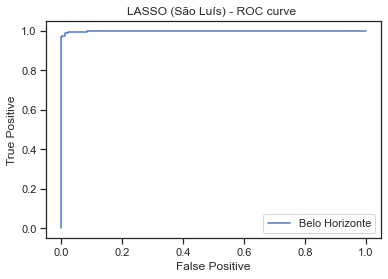

In [103]:
#plt.plot([0,1],[0,1],'k--')
plt.plot(fprBH,tprBH, label='LASSO')
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title('LASSO (São Luís) - ROC curve ')
plt.legend(['Belo Horizonte'])
plt.grid(False)
sns.set_style("ticks")
plt.savefig('ROC_LASSO_SL_vs_BH.png', format='png')

In [65]:
#Area under ROC curve
from sklearn.metrics import roc_auc_score
auc_BH = roc_auc_score(y_BH,y_pred_BH_proba)
print('AUC São Luís vs Belo Horizonte:',auc_BH)

AUC São Luís vs Belo Horizonte: 0.9992753623188405


In [66]:
# define a function that accepts a threshold and prints sensitivity and specificity
def evaluate_threshold(threshold):
    print('sensitivity:', tprBH[thresholdsBH > threshold][-1])
    print('specificity:', 1 - fprBH[thresholdsBH > threshold][-1])

In [67]:
evaluate_threshold(0.5)

sensitivity: 0.9954545454545455
specificity: 0.9782608695652174


In [68]:
evaluate_threshold(0.6)

sensitivity: 0.9954545454545455
specificity: 0.9782608695652174


In [69]:
evaluate_threshold(0.7)

sensitivity: 0.9954545454545455
specificity: 0.9782608695652174


In [70]:
evaluate_threshold(0.8)

sensitivity: 0.990909090909091
specificity: 0.9782608695652174


In [71]:
evaluate_threshold(0.9)

sensitivity: 0.9727272727272728
specificity: 0.9963768115942029


In [72]:
evaluate_threshold(0.99)

sensitivity: 0.004545454545454545
specificity: 1.0


In [33]:
#Testing the Best Model estimated for São Luís (Logistic) in the Brasília's database

df_BRA= pd.read_excel(r"Brasilia_ML_Std.xls")
df_BRA.head()

,SPD,CV,Price_sd,Price_skewness,Price_kurtosis,Cartel_DF
0,-0.717529,-0.626223,-0.666778,-0.196953,-0.477565,1
1,-0.838328,-0.807425,-0.792635,0.885682,-0.286445,1
2,-0.516970,-0.574450,-0.631149,-1.795652,1.239965,1
3,-0.777291,-0.761828,-0.761104,-1.063986,0.201244,1
4,-0.716441,-0.647552,-0.681930,-0.602536,-0.301323,1


In [34]:
# Predicting the Cartel in Brasília
# define X and y
X_BRA = df_BRA.drop("Cartel_DF",axis = 1)
y_BRA = df_BRA.Cartel_DF

In [35]:
# summarize the dataset
print(X.shape, y.shape, X_BRA.shape, y_BRA.shape)

(449, 5) (449,) (489, 5) (489,)


In [36]:
# make class predictions for the testing set
y_pred_BRA = logreg.predict(X_BRA)

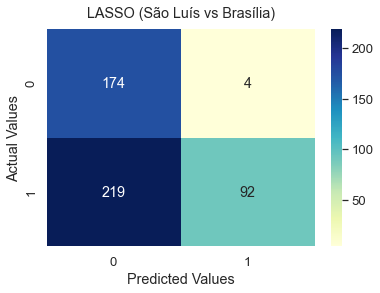

In [114]:
cnf_matrix = metrics.confusion_matrix(y_BRA, y_pred_BRA)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('LASSO (São Luís vs Brasília)', y=1.025)
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.savefig('CM_LASSO_SaoLuis_vs_Brasilia.png', dpi=600)

In [38]:
print(classification_report(y_BRA,y_pred_BRA))

              precision    recall  f1-score   support

           0       0.44      0.98      0.61       178
           1       0.96      0.30      0.45       311

    accuracy                           0.54       489
   macro avg       0.70      0.64      0.53       489
weighted avg       0.77      0.54      0.51       489



In [39]:
y_pred_BRA_proba = logreg.predict_proba(X_BRA)[:,1]
fprBRA, tprBRA, thresholdsBRA = roc_curve(y_BRA, y_pred_BRA_proba)

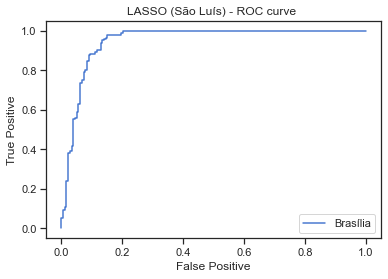

In [101]:
#plt.plot([0,1],[0,1],'k--')
plt.plot(fprBRA,tprBRA, label='LASSO')
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title('LASSO (São Luís) - ROC curve ')
plt.legend(['Brasília'])
plt.grid(False)
sns.set_style("ticks")
plt.savefig('ROC_LASSO_SaoLuis_vs_BRA.png', format='png')

In [44]:
#Area under ROC curve
from sklearn.metrics import roc_auc_score
auc_BRA = roc_auc_score(y_BRA,y_pred_BRA_proba)
print('AUC São Luís vs Brasília:',auc_BRA)

AUC São Luís vs Brasília: 0.9482640268795839


In [49]:
# define a function that accepts a threshold and prints sensitivity and specificity
def evaluate_threshold(threshold):
    print('sensitivity:', tprBRA[thresholdsBRA > threshold][-1])
    print('specificity:', 1 - fprBRA[thresholdsBRA > threshold][-1])

In [50]:
evaluate_threshold(0.5)

sensitivity: 0.2829581993569132
specificity: 0.9775280898876404


In [51]:
evaluate_threshold(0.6)

sensitivity: 0.10932475884244373
specificity: 0.9831460674157303


In [52]:
evaluate_threshold(0.7)

sensitivity: 0.10932475884244373
specificity: 0.9831460674157303


In [53]:
evaluate_threshold(0.8)

sensitivity: 0.10932475884244373
specificity: 0.9831460674157303


In [54]:
evaluate_threshold(0.9)

sensitivity: 0.08360128617363344
specificity: 0.9943820224719101


In [55]:
evaluate_threshold(0.99)

sensitivity: 0.0
specificity: 1.0


In [73]:
#Testing the Best Model estimated for São Luís (Logistic Classifier) in the Caxias do Sul's database
df_CS= pd.read_excel(r"CaxiasdoSul_ML_Std.xls")
df_CS.head()

,SPD,CV,Price_sd,Price_skewness,Price_kurtosis,Cartel_CS
0,-0.502234,-0.771008,-0.954957,-1.152634,0.981293,1
1,-0.011977,-0.384726,-0.753369,-2.024678,2.454060,1
2,-0.637640,-0.824221,-0.983101,-1.343260,1.275377,1
3,0.079973,-0.440566,-0.781865,-2.067829,2.904549,1
4,0.141272,-0.439377,-0.781214,-2.052522,2.963625,1


In [74]:
# Predicting the Cartel in Caxias do Sul
# define X and y
X_CS = df_CS.drop("Cartel_CS",axis = 1)
y_CS = df_CS.Cartel_CS

In [75]:
# summarize the dataset
print(X.shape, y.shape, X_CS.shape, y_CS.shape)

(449, 5) (449,) (484, 5) (484,)


In [76]:
# make class predictions for the testing set
y_pred_CS = logreg.predict(X_CS)

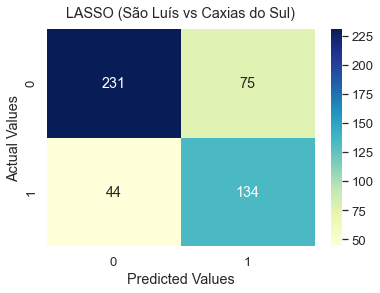

In [115]:
cnf_matrix = metrics.confusion_matrix(y_CS, y_pred_CS)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('LASSO (São Luís vs Caxias do Sul)', y=1.025)
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.savefig('CM_LASSO_SL_vs_CS.png', dpi=600)

In [78]:
print(classification_report(y_CS,y_pred_CS))

              precision    recall  f1-score   support

           0       0.84      0.75      0.80       306
           1       0.64      0.75      0.69       178

    accuracy                           0.75       484
   macro avg       0.74      0.75      0.74       484
weighted avg       0.77      0.75      0.76       484



In [79]:
from sklearn.metrics import roc_curve
y_pred_CS_proba = logreg.predict_proba(X_CS)[:,1]
fprCS, tprCS, thresholdsCS = roc_curve(y_CS, y_pred_CS_proba)

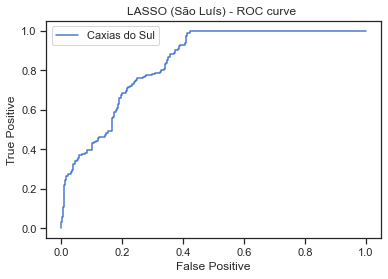

In [99]:
#plt.plot([0,1],[0,1],'k--')
plt.plot(fprCS,tprCS, label='LASSO')
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title('LASSO (São Luís) - ROC curve ')
plt.legend(['Caxias do Sul'])
plt.grid(False)
sns.set_style("ticks")
plt.savefig('ROC_LASSO_SaoLuis_vs_CS.png', format='png')

In [81]:
#Area under ROC curve
auc_CS = roc_auc_score(y_CS,y_pred_CS_proba)
print('AUC São Luís vs Caxias do Sul:',auc_CS)

AUC São Luís vs Caxias do Sul: 0.8406954542116472


In [82]:
# define a function that accepts a threshold and prints sensitivity and specificity
def evaluate_threshold(threshold):
    print('sensitivity:', tprCS[thresholdsCS > threshold][-1])
    print('specificity:', 1 - fprCS[thresholdsCS > threshold][-1])

In [83]:
evaluate_threshold(0.5)

sensitivity: 0.7528089887640449
specificity: 0.7549019607843137


In [84]:
evaluate_threshold(0.6)

sensitivity: 0.6741573033707865
specificity: 0.8006535947712419


In [85]:
evaluate_threshold(0.7)

sensitivity: 0.5561797752808989
specificity: 0.8333333333333334


In [86]:
evaluate_threshold(0.8)

sensitivity: 0.4438202247191011
specificity: 0.8790849673202614


In [87]:
evaluate_threshold(0.9)

sensitivity: 0.29775280898876405
specificity: 0.9607843137254902


In [88]:
evaluate_threshold(0.99)

sensitivity: 0.10674157303370786
specificity: 0.9901960784313726


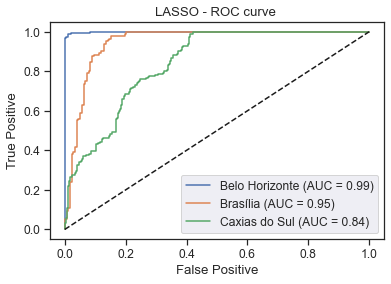

In [117]:
plt.plot(fprBH, tprBH, fprBRA,tprBRA, fprCS, tprCS, label='LASSO')
sns.set(font_scale=1.1) # Adjust to fit
plt.ylabel('True Positive')
plt.xlabel('False Positive')
plt.title('LASSO - ROC curve ')
plt.legend(['Belo Horizonte (AUC = 0.99)', 'Brasília (AUC = 0.95)', 'Caxias do Sul (AUC = 0.84)'])
plt.plot([0,1],[0,1],'k--')
plt.grid(False)
sns.set_style("ticks")
plt.savefig('ROC_LASSO_SaoLuis_vs_BH_BRA_CS.png', format='png', dpi=600)
plt.show()